# High School Students' Mathematics Distinction Prediction using Machine Learning Classification Models


## 1. About the Dataset

This dataset namely ‘student scores’, obtained from Kaggle, has the domain area of education. It is collected from the senior students studying at a large high school at the end of their final semester. It contains the collected data to measure their performance.

This dataset has only one file named ‘student-scores.csv’, which is csv data format. This file has column headers in the first row, and each row represent a student with its data values, which are separated by commas in the csv file. I load and analyze this single file.

It has 17 features(columns) and 2000 observations(rows). Each row represents a student and features are the information of the student showing the performance. The first column ‘id’ contains unique value for each student, so it can be considered as a primary key.

It contains 10 numerical features which are id, absence days, weekly self-study hours, math score, history score, physics score, chemistry score, biology score, English score and geography score.

It contains 4 categorial features, which are first name, last name, email and career aspiration. All of them are nominal.

It contains 3 binary features. The first is gender, which includes only ‘male’ or ‘female’ value. The others are part-time job and extracurricular activities, which includes ‘True’ value if the job or the activities are present and ‘False’ if absent respectively.

## 2.Data Preprocessing

First, to train the machine learning prediction models, the dataset needs to processed some necesary steps like data cleaning, finding and removing missing values, assigning correct data types, renaming column names, feature selection and so on.

Dataset is loaded into pandas dataframe and assigned it into 'df' variable so that 'df' becomes the dataframe containing the dataset. 

In [83]:
#import pandas libary needed for data import and processing
import pandas as pd

In [84]:
#import the libraries needed for visualizaiton
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
df = pd.read_csv('student-scores.csv')
df.head()

,id,first_name,last_name,email,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
0,1,Paul,Casey,paul.casey.1@gslingacademy.com,male,False,3,False,27,Lawyer,73,81,93,97,63,80,87
1,2,Danielle,Sandoval,danielle.sandoval.2@gslingacademy.com,female,False,2,False,47,Doctor,90,86,96,100,90,88,90
2,3,Tina,Andrews,tina.andrews.3@gslingacademy.com,female,False,9,True,13,Government Officer,81,97,95,96,65,77,94
3,4,Tara,Clark,tara.clark.4@gslingacademy.com,female,False,5,False,3,Artist,71,74,88,80,89,63,86
4,5,Anthony,Campos,anthony.campos.5@gslingacademy.com,male,False,5,False,10,Unknown,84,77,65,65,80,74,76


In [86]:
#check shape
df.shape

(2000, 17)

It shows 2000 rowsa and 17 columns in the dataset. Thus, there are 2000 students whose data are present in the dataset. After that, datatype of each column is checked.

In [87]:
#check data type of each column
df.dtypes

id                             int64
first_name                    object
last_name                     object
email                         object
gender                        object
part_time_job                   bool
absence_days                   int64
extracurricular_activities      bool
weekly_self_study_hours        int64
career_aspiration             object
math_score                     int64
history_score                  int64
physics_score                  int64
chemistry_score                int64
biology_score                  int64
english_score                  int64
geography_score                int64
dtype: object

It shows that the categorical features are object datatypes. So, this data type needs to be changed to category type as follows and then, data types are checked again.

In [88]:
#change object data types to category types
df['first_name']=df['first_name'].astype('category')
df['last_name']=df['last_name'].astype('category')
df['email']=df['email'].astype('category')
df['gender']=df['gender'].astype('category')
df['career_aspiration']=df['career_aspiration'].astype('category')

In [89]:
#recheck data type again
df.dtypes

id                               int64
first_name                    category
last_name                     category
email                         category
gender                        category
part_time_job                     bool
absence_days                     int64
extracurricular_activities        bool
weekly_self_study_hours          int64
career_aspiration             category
math_score                       int64
history_score                    int64
physics_score                    int64
chemistry_score                  int64
biology_score                    int64
english_score                    int64
geography_score                  int64
dtype: object

Thus, all data types of features are corrected. 

First, dataset is checked to have null values, and remove the rows with null values because null values can cause inaccuracy in analysis. After that, it is checked for null again. 

In [90]:
#check null values
df.isnull().sum()

id                            0
first_name                    0
last_name                     0
email                         0
gender                        0
part_time_job                 0
absence_days                  0
extracurricular_activities    0
weekly_self_study_hours       0
career_aspiration             0
math_score                    0
history_score                 0
physics_score                 0
chemistry_score               0
biology_score                 0
english_score                 0
geography_score               0
dtype: int64

In [91]:
#remove null values
df.dropna(inplace=True)

In [92]:
#to check the number of rows
df.shape

(2000, 17)

In this case, there is no null values in the original dataset and so, no rows are removed. 

In [93]:
#recheck null values
df.isnull().sum()

id                            0
first_name                    0
last_name                     0
email                         0
gender                        0
part_time_job                 0
absence_days                  0
extracurricular_activities    0
weekly_self_study_hours       0
career_aspiration             0
math_score                    0
history_score                 0
physics_score                 0
chemistry_score               0
biology_score                 0
english_score                 0
geography_score               0
dtype: int64

There are some unnecessary columns or features(id,email, first name, last name) for the model training and so these columns are removed to create a new dataframe(named 'data') with selected features as feature selection.

In [94]:
#feature selectiion
# remove unnecessary columns from the dataframe and assign a new dataframe, named 'data' with required columns for EDA
columns_to_delete = ['id','first_name','last_name','email']
data = df.drop(columns_to_delete,axis=1)
data.head()

,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
0,male,False,3,False,27,Lawyer,73,81,93,97,63,80,87
1,female,False,2,False,47,Doctor,90,86,96,100,90,88,90
2,female,False,9,True,13,Government Officer,81,97,95,96,65,77,94
3,female,False,5,False,3,Artist,71,74,88,80,89,63,86
4,male,False,5,False,10,Unknown,84,77,65,65,80,74,76


In this dataset, all column names are considered to be appropiate for analysis and so they are left as orginal. 

## 3. Preparing the data for ML classification

For preparing the dataset, firstly I check the dataset, its features(columns), number or rows as follows. 

In [95]:
#to see the dataset for checking
data

,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
0,male,False,3,False,27,Lawyer,73,81,93,97,63,80,87
1,female,False,2,False,47,Doctor,90,86,96,100,90,88,90
2,female,False,9,True,13,Government Officer,81,97,95,96,65,77,94
3,female,False,5,False,3,Artist,71,74,88,80,89,63,86
4,male,False,5,False,10,Unknown,84,77,65,65,80,74,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,male,False,2,False,30,Construction Engineer,83,77,84,73,75,84,82
1996,male,False,2,False,20,Software Engineer,89,65,73,80,87,67,73
1997,female,False,5,False,14,Software Engineer,97,85,63,93,68,94,78
1998,female,True,10,True,5,Business Owner,51,96,72,89,95,88,75


I have decided to select 3 columns, which are absence_days, weekly_self_study_hours and part_time_job as input features. For target feature, I would choose math score column. As it is numerical, I need to binarize this numerical feature. Firstly, assess this math score column how to set a threshold to divide into 2 classes. 

In [96]:
#review the detail description of math score
data['math_score'].describe()

count    2000.000000
mean       83.452000
std        13.224906
min        40.000000
25%        77.000000
50%        87.000000
75%        93.000000
max       100.000000
Name: math_score, dtype: float64

<Axes: >

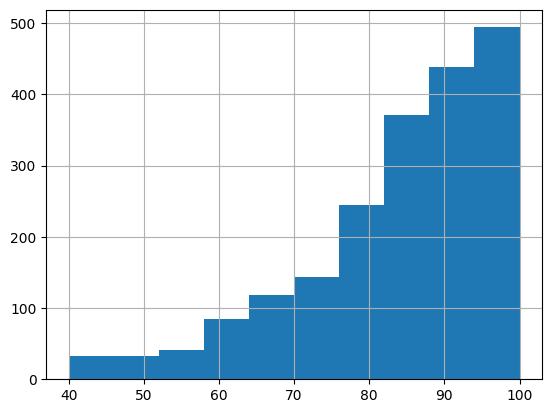

In [97]:
#check the data distribution of math score by histogram
data['math_score'].hist()

According to the data distribution and my preexisting knowledge, I have decided to set a threshold of math score 80. Equal or above to 80, students will obtain math distinction and below 80, they have no math distinction. For this target feature, I need to create a new column from math_score as follows.

In [98]:
#create a math distinction column
data['math_distinction'] = data[['math_score']]>=80

In [99]:
#check the dataset for the new column
data.head()

,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score,math_distinction
0,male,False,3,False,27,Lawyer,73,81,93,97,63,80,87,False
1,female,False,2,False,47,Doctor,90,86,96,100,90,88,90,True
2,female,False,9,True,13,Government Officer,81,97,95,96,65,77,94,True
3,female,False,5,False,3,Artist,71,74,88,80,89,63,86,False
4,male,False,5,False,10,Unknown,84,77,65,65,80,74,76,True


Thus, if math_score is equal or above 80, it returns True in math_distinction column, which means the student gets math distinction, and if below 80, it return False, meaning the students do not achieve math distinction. Then, check the number of each class as follows.

Selected input features, absence days, weekly_self_study_hours, and part_time_job of students are logically reasonable to predict whether the student can get math distinction or not. Generally, they can have an impact on students' study on subjects and the study results, scores, and math is chosen and becomes the target variable for classification, math scores equal to or above 80 are considered as students with math distinction, and below are not. This threshold is based on math scores distribution and preexisting knowledge on distinction marks. With a classifier, a student with known features can be predicted to get math distinction or not.

In [100]:
#check the number of students that achieve math distinction
data['math_distinction'].sum()

np.int64(1394)

In [101]:
#check the number of students that do not achieve math distinction 
len(data) - data['math_distinction'].sum()

np.int64(606)

Then, I will extract the necessary columns (input features and target) in a new dataframe to make clear and remove unwanted columns as follows.

In [102]:
data_for_classification = data[['absence_days','weekly_self_study_hours','part_time_job','math_distinction']]

In [103]:
#check the new dataframe
data_for_classification

,absence_days,weekly_self_study_hours,part_time_job,math_distinction
0,3,27,False,False
1,2,47,False,True
2,9,13,False,True
3,5,3,False,False
4,5,10,False,True
...,...,...,...,...
1995,2,30,False,True
1996,2,20,False,True
1997,5,14,False,True
1998,10,5,True,False


In [104]:
#first check the data types of the dataset
data_for_classification.dtypes

absence_days               int64
weekly_self_study_hours    int64
part_time_job               bool
math_distinction            bool
dtype: object

Part_time_job and math_distinction are boolean data type as shown. Both are binary having boolean values, False and True. These values should be encoded into 0 and 1 respectively. Athough they are not ordinal, they have only 2 values (binary), and so ordinal encoding method using pd.factorize function of pandas will be used for encoding. I assumed that one hot encoding is not appropiate for just 2 values as it create a new column, which is unnecessary. I will use ordinal encoding to save memory and computational resources.

In [105]:
#extract the labels of part_time_job feature by converting False into 0 and True into 1. It returns labels and unique
labels, unique = pd.factorize(data_for_classification["part_time_job"], sort=True)

In [106]:
#check the labels
labels

array([0, 0, 0, ..., 0, 1, 0])

In [107]:
#check the unique values 
unique

Index([False, True], dtype='bool')

In [108]:
#check both of them and datatype
print(labels, unique)

[0 0 0 ... 0 1 0] Index([False, True], dtype='bool')


In [109]:
#transform boolean values(False, True) of part_time_job column into 0 or 1 of the labels array by assigning labels to this column
data_for_classification["part_time_job"] = labels

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11556\250741904.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_classification["part_time_job"] = labels


In [110]:
#check the transformation
data_for_classification

,absence_days,weekly_self_study_hours,part_time_job,math_distinction
0,3,27,0,False
1,2,47,0,True
2,9,13,0,True
3,5,3,0,False
4,5,10,0,True
...,...,...,...,...
1995,2,30,0,True
1996,2,20,0,True
1997,5,14,0,True
1998,10,5,1,False


Now, part_time_job has 0 or 1 values. The same function and process will be performed to transform the boolean values(False, True) of math_distinction feature into 0 or 1 respectively.

In [111]:
#transform boolean values(False, True) of part_time_job column into 0 or 1 of the labels array and assign the array in the math_distinction column of dataset
labels, unique = pd.factorize(data_for_classification["math_distinction"], sort=True)
data_for_classification["math_distinction"] = labels

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11556\1249320291.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_classification["math_distinction"] = labels


In [112]:
#check the transformation
data_for_classification

,absence_days,weekly_self_study_hours,part_time_job,math_distinction
0,3,27,0,0
1,2,47,0,1
2,9,13,0,1
3,5,3,0,0
4,5,10,0,1
...,...,...,...,...
1995,2,30,0,1
1996,2,20,0,1
1997,5,14,0,1
1998,10,5,1,0


Now, math_distinction has 0 or 1 value. Now, we have features,all having neumerical values. This can be proved by checking the datatypes of the dataset as follows. 

In [113]:
#check the datatype of this dataset
data_for_classification.dtypes

absence_days               int64
weekly_self_study_hours    int64
part_time_job              int64
math_distinction           int64
dtype: object

It mentions that all columns(features) have integer type. Thus, all features are neumerical that are suitable for classification algorithm.

The target classes, True(1) and False(0) of math_distinction are plotted on the histogram as follows to check the class imbalance. 

<Axes: >

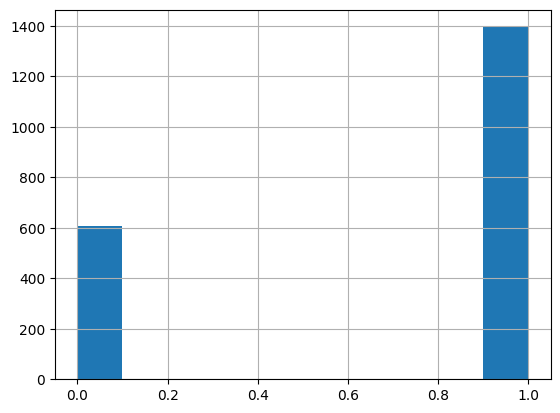

In [114]:
#plot the histogram of math_distinction column
data_for_classification['math_distinction'].hist()

From the histogram, it can be seen that the number of class 0 (False) is over 600 and that of class 1 is nearly 1400.

The class 0 has only 32% of dataset, having mild class imbalance. Classification models trained may have to spend more time on learning majority class and does not learn enough minority class. It can lead to mild poor generalization and performance, and cannot make accurate prediction especially for class 0.

Now training data and testing data are set as data_X and data_y by extracting from the dataset

In [115]:
#extract the features X from the data array and assigned into data_X
data_X = data_for_classification.drop('math_distinction', axis=1)

#extract the target variable y from the data array and assigned into data_y
data_y = data_for_classification['math_distinction']

In [116]:
#check the features array
data_X

,absence_days,weekly_self_study_hours,part_time_job
0,3,27,0
1,2,47,0
2,9,13,0
3,5,3,0
4,5,10,0
...,...,...,...
1995,2,30,0
1996,2,20,0
1997,5,14,0
1998,10,5,1


In [117]:
#check the shape of features array
data_X.shape

(2000, 3)

It proved that data_X array contain 3 input features of 2000 examples with the correct shape, being compatible for training.

In [118]:
#check the target variable array
data_y

0       0
1       1
2       1
3       0
4       1
       ..
1995    1
1996    1
1997    1
1998    0
1999    1
Name: math_distinction, Length: 2000, dtype: int64

In [119]:
#check the shape of target variable array
data_y.shape

(2000,)

It proved that data_y array contains output single target variable of 2000 examples with the correct shape and binary values(0 or 1), being compatible for training.

The data will be splited into training and testing using stratified train-test partitioning method as follows.

In [120]:
import numpy as np
# Set the seed of the pseudo randomization to make sure that same results are produced in every executions
RANDOM_SEED = 2023
np.random.seed(RANDOM_SEED)

## 4. Classficication Models Training and Evaluation

For this, firstly necessary classes from sklearn library are imported first. 

In [121]:
#import classes for training different classifciation algorithm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

In [122]:
#import classes required to measure the performance of classification algorithms
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

In [123]:
#import time class to measure training time and prediction time
import time

KNN will be used as one of the classification algorithm. For KNN, features need to be normalized first as it relies on the distance between data points and it is sensitive to differnt ranges of features. Thus, values of all features need to be converted into within a range of 0 to 1 as normalization. MinMax normalization will be used in this case. Normalization of data cannot affect negatively for other classifiers. 
Then, the normalized data will be splited into training and testing using stratified train-test partitioning method as follows.

In [124]:
#create an object for minmax normalization
scaler = MinMaxScaler()

# normalize the data_X only with this object, data_y does not need normalization
data_X_normalized = scaler.fit_transform(data_X)

#import the train_test_split of sklearn that can split the data
from sklearn.model_selection import train_test_split
# Create splits from the normalized dataset use the same splitting method above
X_train_norm, X_test_norm, y_train, y_test = train_test_split(data_X_normalized,
                                                              data_y,
                                                              test_size=0.2,stratify=data_y,
                                                              random_state=RANDOM_SEED)

Stratified train-test partitioning splits the data, maintaining the same proportion of each class in training and testing sets, and ensuring training and evaluating on a representative sample. It is useful in this class-imbalanced dataset, as it can improve overall performance metrics and better generalization to unseen data. 

In [125]:
#check the range of normalized data_X training set
print(np.min(X_train_norm))
print(np.max(X_train_norm))

0.0
1.0


In [126]:
#check the range of normalized data_X training set
print(np.min(X_test_norm))
print(np.max(X_test_norm))

0.0
1.0


As minimum is 0 and maximum is 1, the data is ranging between 0 and 1. So, the features are normalized.

In [127]:
#check the shape of input features of training dataset
X_train.shape

(1600, 3)

In [128]:
#check the shape of output target of training dataset
X_test.shape

(400, 3)

In [129]:
#check the shape of input features of testing dataset
y_train.shape

(1600,)

In [130]:
#check the shape of output target of testing dataset
y_test.shape

(400,)

As above, it can be seen that normalized testing dataset has 400 examples which is 20% of orginal dataset(2000 examples) before splitting. The shapes of training and testing of input features and output target are correct for ML classifier algorithm.

Firstly, Decision tree model will be trained on training dataset. Then, the trained model will be tested on testing set.

In [131]:
#set the decision tree algorithm 
classifier = DecisionTreeClassifier()

#train the model with normalized x_train and y_train
classifier.fit(X_train_norm,y_train)

#trained model is used to generate predictions from input features of testing data, x_test
y_predicted = classifier.predict(X_test_norm)

In [132]:
#4 evaluation metrics are calculated from predictions of the trained decision tree model (y_predicted) and actual output (y_test)
accuracy_result = accuracy_score(y_test, y_predicted)
precision_result = precision_score(y_test, y_predicted)
recall_result = recall_score(y_test, y_predicted)
f1_result = f1_score(y_test, y_predicted)

In [133]:
#generate the results of evaluation metrics
print('accuracy of Decision Tree model:', accuracy_result)
print('precision of Decision Tree model:', precision_result)
print('recall of Decision Tree model:', recall_result)
print('f1 of Decision Tree model:', f1_result)

accuracy of Decision Tree model: 0.705
precision of Decision Tree model: 0.7728813559322034
recall of Decision Tree model: 0.8172043010752689
f1 of Decision Tree model: 0.794425087108014


By this way, classification model can be trained and tested by evaluation metrics.

Different models can be trained, tested at the same time, and their evaluation metrics results can be compared as follows:


A dictionary with 10 ML classifiers is created as  follows. Regarding classification algorithm, Decision tree(DT), random forest(RF), K Nearest Neighbours(KNN), Suport Vector Machine(SVM) and Stochastic Gradient Descent(SDG) are selected. Each has 2 variants with different hyperparameters and so total 10 classifiers are obtained. 

In [134]:
#crreate a dictory named 'model' in which key is the name of each of the classifers and value is the respective classifier object with specific hyperparameters. 
models = {
    "DT_gini": DecisionTreeClassifier( criterion='gini',max_depth = 5),  #Decision tree with gini criterion and max depth is 5
    'DT_entropy': DecisionTreeClassifier( criterion='entropy', max_depth = 5), #Decision tree with entropy criterion and the same max depth
    "RF_gini": RandomForestClassifier(n_estimators=30, criterion='gini', max_depth=5), #Random forest with gini criterion, 30 estimators and 5 max depth
    "RF_entropy": RandomForestClassifier(n_estimators=30, criterion='entropy', max_depth=5), # Random forest with the entropy criterion and the same number of estimators and max depth
    "KNN_3neighbours": KNeighborsClassifier(n_neighbors=3), #KNN with 3 neighours
    "KNN_5neighbours": KNeighborsClassifier(n_neighbors=5), ##KNN with 5 neighours
    "SVM_rbf_kernel": SVC(kernel='rbf'), #SVM with rbf kernel
    "SVM_linear_kernel": SVC(kernel='linear'), #SVM with linear kernel
    'SGD_hinge_loss': SGDClassifier(loss="hinge", penalty="l2", max_iter=100), #SGD with hinge loss, penalty 'l2' and 100 max iteration
    'SGD_log_loss': SGDClassifier(loss="log_loss", penalty="l2", max_iter=100) #SGD with logistic loss, same penalty 'l2' and same number of max iteration
}

# iterate over the dictionary to view the name and the classifier object as follows:
for name, classifier in models.items():
    print("The name of the classifier is:", name, " and it is a sklearn object:", classifier)

The name of the classifier is: DT_gini  and it is a sklearn object: DecisionTreeClassifier(max_depth=5)
The name of the classifier is: DT_entropy  and it is a sklearn object: DecisionTreeClassifier(criterion='entropy', max_depth=5)
The name of the classifier is: RF_gini  and it is a sklearn object: RandomForestClassifier(max_depth=5, n_estimators=30)
The name of the classifier is: RF_entropy  and it is a sklearn object: RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=30)
The name of the classifier is: KNN_3neighbours  and it is a sklearn object: KNeighborsClassifier(n_neighbors=3)
The name of the classifier is: KNN_5neighbours  and it is a sklearn object: KNeighborsClassifier()
The name of the classifier is: SVM_rbf_kernel  and it is a sklearn object: SVC()
The name of the classifier is: SVM_linear_kernel  and it is a sklearn object: SVC(kernel='linear')
The name of the classifier is: SGD_hinge_loss  and it is a sklearn object: SGDClassifier(max_iter=100)
The name

In [135]:
#create a dataframe, named 'results' that will store the performance metrics of each classifiers 
results = pd.DataFrame({
                        "classifier_name": [],
                        "training_time": [],
                        "prediction_time": [],
                        "accuracy": [],
                        "precision": [],
                        "recall": [],
                        "f1": []
                        })
#to view the currently empty dataframe
results

,classifier_name,training_time,prediction_time,accuracy,precision,recall,f1


Training data of features(X_train_norm) and target(y_train) will be trained by each classifer with specific hyperparameters and then, the trained model will be used to predict labels of the testing data of feaures(X_test_norm) at each iteration of for loop as follows. Then, the predicted labels and actual labels(y_test) of target are compared to calcuate performance metrics (accuracy, precision, recall, F1 score) for each classifer. Training and prediction times are also collected. By this way, experimental evaluation of the classifiers are created and run as follows. 

In [136]:
# Apply the classifier object to each dataset to train and then test it
#for loop for items in dictionary will be performed to iterate the same process for every classifer
for name, classifier in models.items():

    # measure starting time of training
    t_start = time.time()
    #apply the specific classifier from the for loop to start training 
    classifier.fit(X_train_norm,y_train)
    # measure the ending time of training
    t_end = time.time()
    # subtract from ending time to starting time to know the training time
    training_time = t_end - t_start
    #######

    # measure starting time of prediction
    t_start = time.time()
    # Predict on test set
    y_predicted = classifier.predict(X_test_norm) #predict on the testing X data by using the trained classifer object, predicted labels are returned
    # measure ending time of prediction
    t_end = time.time()
    # subtract from ending time to starting time to know the prediction time
    prediction_time = t_end - t_start
   
    # calculate performance metrics from testing data of target (y) and the predicted data labels 
    accuracy_result = accuracy_score(y_test, y_predicted)
    precision_result = precision_score(y_test, y_predicted)
    recall_result = recall_score(y_test, y_predicted)
    f1_result = f1_score(y_test, y_predicted)
   
    #add the performance metrics, training time and prediction time into a dataframe called 'this_result'
    this_result = pd.DataFrame({
                    "classifier_name": [name],
                    "training_time": [training_time],
                    "prediction_time": [prediction_time],
                    "accuracy": [accuracy_result],
                    "precision": [precision_result],
                    "recall": [recall_result],
                    "f1": [f1_result]
                    })
    # Append this dataframe'this_result' to the main dataframe 'results'
    results = pd.concat([results, this_result], axis=0, ignore_index=True)
    
#By this way, at each time of the loop, classifier name, times and performance metrics of the classifier is added into the main 'results' dataframe.

In the above cell, Each classifer object is fit to the training data to go iterative training process and then, resulted classifers are obtained. These final classifers are used to predict testing features((x_test_norm) to produce predicted labels of target (y_predicted), which will be compared with actual target(y_test) of testing set to calcuate performance metrics and times.

Dataframe of classifiers and their training and prediction times, performance metrics are obtained.

In [137]:
#view this dataframe
results

,classifier_name,training_time,prediction_time,accuracy,precision,recall,f1
0,DT_gini,0.003996,0.000999,0.7125,0.775168,0.827957,0.800693
1,DT_entropy,0.001998,0.000999,0.7125,0.775168,0.827957,0.800693
2,RF_gini,0.071960,0.002997,0.7250,0.749263,0.910394,0.822006
3,RF_entropy,0.072943,0.002996,0.7325,0.759036,0.903226,0.824877
4,KNN_3neighbours,0.002997,0.028984,0.6925,0.740741,0.860215,0.796020
5,KNN_5neighbours,0.001999,0.028983,0.7000,0.758958,0.835125,0.795222
6,SVM_rbf_kernel,0.167618,0.061965,0.7525,0.755682,0.953405,0.843106
7,SVM_linear_kernel,0.066392,0.013011,0.6975,0.697500,1.000000,0.821797
8,SGD_hinge_loss,0.004997,0.000000,0.7475,0.776398,0.896057,0.831947
9,SGD_log_loss,0.009993,0.000000,0.7225,0.802158,0.799283,0.800718


Then, this dataframe is converted into a csv format, a csv file is created, and saved in the computer to make sure the presence of results.

In [138]:
file_name = "results_classification_evaluation.csv"
results.to_csv(file_name, index=False)

In [139]:
#read the csv file to see the peformance metrics and the times of the 10 classifiers.
results = pd.read_csv("results_classification_evaluation.csv")
results

,classifier_name,training_time,prediction_time,accuracy,precision,recall,f1
0,DT_gini,0.003996,0.000999,0.7125,0.775168,0.827957,0.800693
1,DT_entropy,0.001998,0.000999,0.7125,0.775168,0.827957,0.800693
2,RF_gini,0.071960,0.002997,0.7250,0.749263,0.910394,0.822006
3,RF_entropy,0.072943,0.002996,0.7325,0.759036,0.903226,0.824877
4,KNN_3neighbours,0.002997,0.028984,0.6925,0.740741,0.860215,0.796020
5,KNN_5neighbours,0.001999,0.028983,0.7000,0.758958,0.835125,0.795222
6,SVM_rbf_kernel,0.167618,0.061965,0.7525,0.755682,0.953405,0.843106
7,SVM_linear_kernel,0.066392,0.013011,0.6975,0.697500,1.000000,0.821797
8,SGD_hinge_loss,0.004997,0.000000,0.7475,0.776398,0.896057,0.831947
9,SGD_log_loss,0.009993,0.000000,0.7225,0.802158,0.799283,0.800718


By this way, final results of performance metrics(accuracy, precision,recall, f1 score), training time, prediction time of 10 the ML classifiers are obtained. 

Which algorithm has the highest performance metric in prediction?

For this, performance metrics of the classfiers will be compared visually on a column chart to make it easy and prominent. First, the 4 metrics of each group are grouped. Then, column chart will be created 

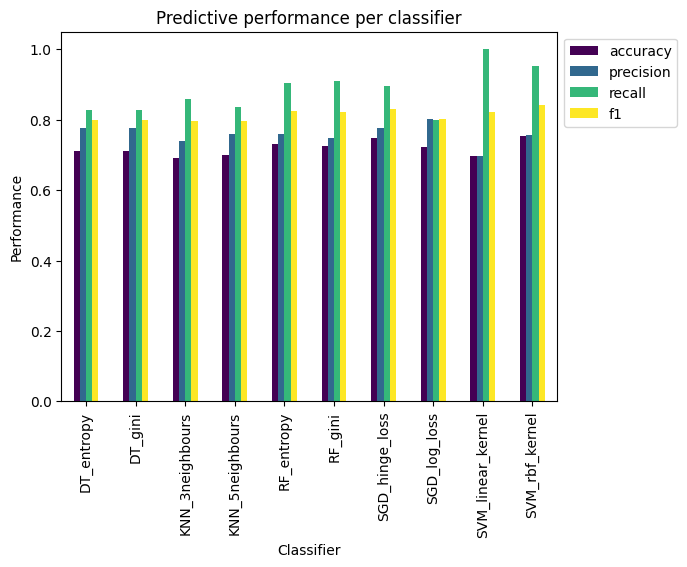

In [140]:
classifier_performance = results.groupby(by=["classifier_name"]).first()
# Select columns of performance metrics that will be used for column chart 
cols_performance = ["accuracy","precision","recall","f1"]
classifier_performance[cols_performance].plot.bar(   #create a bar or column chart
    subplots=False,
    cmap="viridis" )

# give labels to title, x-axis, y-axis, legend
plt.title("Predictive performance per classifier")
plt.xlabel("Classifier")
plt.ylabel("Performance")
plt.legend(bbox_to_anchor=(1, 1)) # show legend outside
plt.show()

## 5. Model Selection for Deployment

I will select the Random Forest with entropy criterion (RF_entropy) because it offers an excellent balance between performance and efficiency. It achieved a high accuracy of 74.5% and a strong F1-score of 0.835, indicating reliable and consistent predictions across both classes. Its recall of 92.8% ensures that most students who deserve distinction are correctly identified.

Additionally, with a low prediction time of just 0.002 seconds, it is highly efficient and suitable for deployment in real-time environments. Other classifiers (like SVM_rbf_kernel) can have slightly better performance, but RF_entropy offers faster prediction with nearly comparable metrics, making it the best practical choice for deployment.

With this model, we can predict whether the student will get distinction in mathematics or not by knowing his number of absence days, weekly self study hours, and part time job presence or absence. 